ChEn-5310: Computational Continuum Transport Phenomena Spring 2022 UMass Lowell; Prof. V. F. de Almeida **10Feb22**

# 16. Rayleigh-Ritz Method w/ Finite Element Lagrange Basis Functions
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Dmtrx}{\boldsymbol{\mathsf{D}}}
  \newcommand{\Gmtrx}{\boldsymbol{\mathsf{G}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\fvec}{\boldsymbol{\mathsf{f}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \newcommand{\Reals}{\mathbb{R}}
  \newcommand{\thetavec}{\boldsymbol{\theta}}
  \newcommand{\Ecal}{\mathcal{E}}
$

---

## Table of Contents<a id="toc"></a>

* [Analytical Solution](#Analy)
* [Objectives](#obj)
1. [Poisson Eigenvalue Problem with Dirichlet Boundary Conditions](#problem)
1. [Rayleigh-Ritz Method with Dirichlet Boundary Conditions](#rayleigh-ritz)
   + [Data](#data)
   + [Finite Element Lagrange Basis Functions](#fem-lagrange-basis)
   + [Results](#results)
---

## [Analytical Solution](#toc)<a id="Analy"></a>

### Particle in Box: 


 Imagine a classical free particle of mass $\mu$ and energy E is bouncing back and forth between walls separated by a distance L apart. This is sometimes called the particle in a box. One wall is at x = 0 and the other is at x = L, where L is the length of the box. Wave functions for the particle in a box must satisfy $\psi(0) = \psi(L) = 0$.
You can use any arbitrary potential function, in this case potential is zero in the box (x from 0 to L).

Consider the wave function; $  \psi(x) =  A\,\sin(kx)   $ for $ 0 < x < L $ and $ \psi(x) = 0 $ for  elsewhere. 
To find "A", we use the normalization equation: 

$ \int_{0}^{L} |\psi(x)|^2dx = 1 $      then : $ A = \sqrt{\frac{2}{\\L}} $


This wave function must satisfies the Schrodinger eq:

$-\frac{h^2}{\\2μ} \frac{d^2\psi}{\\dx^2} + V(x)\psi = E\psi$,   in which $V(x)$ is zero and $kL = πn$ for n = 1, 2, ...

 With B.C: 
 $ \psi(0) = \psi(L) = 0 $
 
The energy eigenstates |n> have wave functions:

$ \psi_n(x) = \sqrt{\frac{2}{\\L}} \sin(k_nx) $

where $ k_n = πn/L $ and $ n = 1, 2, ...$ Again, we have a discrete quantum number n labeling the possible states. By substitution this wave function in Schrodinger equation, their energies can be obtained by:


$\frac{h^2}{2\mu} \sqrt{\frac{2}{L}}k_n^2\,\sin(k_nx)  + V(x)\sqrt{\frac{2}{L}} \sin(k_nx) = E\sqrt{\frac{2}{L}} \sin(k_nx)$

we had $ V(x) = 0 $

$    \frac{h^2}{\\2μ} k_n^2   = E           $



$ E_n = \frac{h^2 k_n^2}{\\2μ} =  \Bigg(\frac{π^2 h^2}{\\2μL^2}\Bigg) n^2                                             $

Energy levels and stationary state wave functions for the particle in a 1-D box. It is a common convention for the wave functions to be drawn on the corresponding energy level.

###### Expectation values
Suppose our quantum system is in a state $|\psi>$ and we measure the observable A. The nth outcome occurs with probability 

$p(n)= |<n|\psi>|^2 = <\psi|n> <n |\psi>  $

The mean or expectation value $<A>$ is the average of the numerical values $A_n$, weighted by their probabilities. That is:

$ <A> = \sum_{n}^{} A_n p(n) $

For a quantum state $|\psi>$, the expectation value of position is:

$ <x> = <\psi|X|\psi> = \int_{0}^{L} x \psi(x)^2 dx   $

And the expectation value of momentum is:

$ <p> = <\psi|P|\psi> = \int_{0}^{L} \psi(x)^*(-i\hbar) (\frac{d\psi}{dx}) dx   $

In this case as the Hamiltonian is time-independent, the expectation values always remain constant over time. 

expectation_position for n=1 :  (3.2400000000000007, 3.597122599785508e-14)
expectation_position for n=2 :  (3.2400000000000007, 3.597122599785508e-14)
expectation_position for n=3 :  (3.2400000000000007, 3.597122599785508e-14)
expectation_position for n=4 :  (3.2400000000000007, 3.597122599785508e-14)
expectation_linear_momentum for n=1 :  (-5.534693546442062e-17, 1.0999723154461499e-14)
expectation_linear_momentum for n=2 :  (2.3884849213696053e-17, 2.2102770810800183e-14)
expectation_linear_momentum for n=3 :  (-2.5173832778415044e-16, 3.228572612730507e-14)
expectation_linear_momentum for n=4 :  (-1.4191147611838107e-15, 4.548402628733521e-14)


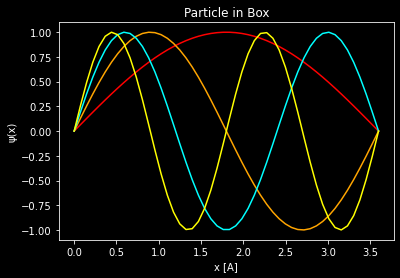

In [240]:
import numpy as np
import scipy as sp
import sympy as smp
import sympy as sym
from scipy.integrate import quad
from sympy import *
from scipy.integrate import cumulative_trapezoid 
from scipy.misc import derivative

import math
import matplotlib.pyplot as plt
plt.style.use('dark_background')

L=3.6 # Angstrom
xlist=np.linspace(0 ,L)

x = smp.symbols('x')
nlist=np.linspace(1 , 5, 4)
hbar=1 
#------------------------------------------- wave_function ----------------
def wave_function(x, n):
    return np.sin(n*x*np.pi/L)


ylist=wave_function(xlist, 1)
zlist=wave_function(xlist, 2)
glist=wave_function(xlist, 3)
mlist=wave_function(xlist, 4)
alist=wave_function(xlist, 5)
plist=wave_function(xlist, 6)
hlist=wave_function(xlist, 7)
klist=wave_function(xlist, 8)
plt.plot(xlist,ylist, label="W1", color='red')
plt.plot(xlist,zlist , label="W2", color='orange')
plt.plot(xlist,glist , label="W3", color='cyan')
plt.plot(xlist,mlist,label='W4', color='yellow')
#plt.plot(xlist,alist ,label='W5', color='pink')
#plt.plot(xlist,plist ,label='W6', color='purple')
#plt.plot(xlist,hlist ,'--',label='W7', color='pink')
#plt.plot(xlist,klist ,label='W8', color='orange')
plt.xlabel('x [A]');plt.ylabel('ψ(x)')
plt.title('Particle in Box' )


##-----------------------------------Expectation Value: position--------------------

def expectation_position1(x):
     return x*(np.sin(1*x*np.pi/L))**2
    
expectation_position1 = quad(expectation_position1, 0, L )

def expectation_position2(x):
     return x*(np.sin(2*x*np.pi/L))**2
expectation_position2 = quad(expectation_position2, 0, L )

def expectation_position3(x):
     return x*(np.sin(3*x*np.pi/L))**2
expectation_position3 = quad(expectation_position3, 0, L )

def expectation_position4(x):
     return x*(np.sin(4*x*np.pi/L))**2
expectation_position4 = quad(expectation_position4, 0, L )

print('expectation_position for n=1 : ', expectation_position1)
print('expectation_position for n=2 : ', expectation_position1)
print('expectation_position for n=3 : ', expectation_position1)
print('expectation_position for n=4 : ', expectation_position1)

##-----------------------------------Expectation Value: linear_momentum --------------- 
def expectation_linear_momentum1(x):
     return -1*(np.pi/L)*np.cos(1*x*np.pi/L)*(np.sin(1*x*np.pi/L))             
expectation_linear_momentum1 = quad(expectation_linear_momentum1, 0, L )

def expectation_linear_momentum2(x):
     return -2*(np.pi/L)*np.cos(2*x*np.pi/L)*(np.sin(2*x*np.pi/L))             
expectation_linear_momentum2 = quad(expectation_linear_momentum2, 0, L )

def expectation_linear_momentum3(x):
     return -3*(np.pi/L)*np.cos(3*x*np.pi/L)*(np.sin(3*x*np.pi/L))             
expectation_linear_momentum3 = quad(expectation_linear_momentum3, 0, L )

def expectation_linear_momentum4(x):
     return -4*(np.pi/L)*np.cos(4*x*np.pi/L)*(np.sin(4*x*np.pi/L))             
expectation_linear_momentum4 = quad(expectation_linear_momentum4, 0, L )



print('expectation_linear_momentum for n=1 : ',  expectation_linear_momentum1)
print('expectation_linear_momentum for n=2 : ',  expectation_linear_momentum2)
print('expectation_linear_momentum for n=3 : ',  expectation_linear_momentum3)
print('expectation_linear_momentum for n=4 : ',  expectation_linear_momentum4)



## [Objectives](#toc)<a id="obj"></a>

 + Describe the Rayleigh-Ritz method for solving linear differential equations with symmetric positive definite operators (OneNote [Engy-5310-rayleigh-ritz-method](https://studentuml-my.sharepoint.com/:o:/g/personal/valmor_dealmeida_uml_edu/EsTzIb2Mcv5OkcSk0kSXXF8BXM4OnlzGfAd7sdcWLky-Gw?e=FQvvy1)).
 + Use the function approximation theory described in the course (see previous notebooks and notes).
 + Apply the finite element Lagrange basis functions.

## [Poisson Eigenvalue Problem with Dirichlet Boundary Conditions](#toc)<a id="problem"></a>

The following sections describe what is referred to in the literature as the one-dimensional Poisson problem with Dirichlet boundary conditions. This is a classical boundary-value problem of mathematics.

The motion of a quantum free particle of mass $\mu$ and energy $E$ confined to a box of size $L$ is described by the Schrodinger equation and the following associated problem of finding the wave function $\psi:[0,L]\subset\Reals\rightarrow\Reals$ such that:

\begin{align*}
 -\frac{\hbar^2}{\\2\mu} \frac{d^2\psi}{\\dx^2} + V(x)\,\psi &= E\,\psi \quad\quad \forall \quad\quad x\in\ ]0,L[, \\
  \psi(0) &= 0, \\
  \psi(L) &= 0,
\end{align*}

with no potential energy $V(x)\equiv 0$.

In this course's notation, it is equivalent to solving the Poisson model problem. Find $u:[a,b]\subset\Reals\rightarrow\Reals$ such that:

\begin{align*}
 -\bigl(-D\, u'\bigr)'(x) + E\,u(x) &= 0 \quad\quad \forall \quad\quad x\in\ ]a,b[, \\
 u(a) &= 0, \\
 u(b) &= 0.
\end{align*}
   
This problem is linear and has an analytical solution for given data: diffusion coefficient, $D$, source, and $E$ slope. The *diffusion flux* associated to the quantity $u$, is denoted $q := -D\,u'$, and it is often of interest as a derived quantity.

The normal diffusive flux at $x=b$ is $q_n(b) = -D\,u'(b) = q_{nb}$

The values of the dependent variable are given on the two end points of the domain. This is called *essential* boundary conditions or  *Dirichlet boundary conditions*. If the values are equal to zero, the boundary condition is referred to as homogeneous.

## [Rayleigh-Ritz Method w/ Dirichlet Boundary Conditions](#toc)<a id="rayleigh-ritz"></a>

Find $u^*_N \in V_N(a,b)\subset V(a,b) = \bigl\{ u:[a,b]\subset\Reals\rightarrow\Reals  \bigr\}$ such that it minimizes the Poisson energy norm:

\begin{equation*}
   \norm{u_0-u^*_N}^2_{\Ecal} = \min\limits_{u_0\, \in\, V} \norm{u_0-u_N}^2_{\Ecal},
\end{equation*}

where 
$V_N(a,b) := \bigl\{ u_N = \sum\limits_{i=1}^N\,c_i\,\phi_i \mid u_N(a) = u_N(b) = 0, (u'_N,u'_N) < \infty \bigr\}$, $\{\phi_i\mid i=1\ldots,N\}$ is a basis of $V_N(a,b)$.

The optimum coefficients $\cvec^* := \{c_i\mid i=1,\ldots,N\}$ solve

\begin{equation*}
  \overset{(N\times N)}{\Amtrx} \,\overset{(N\times 1)}{\cvec^*}  = 
  \biggl(\overset{(N\times N)}{\Dmtrx} - E\,\overset{(N\times N)}{\Gmtrx}\biggr)\,\overset{(N\times 1)}{\cvec^*} = \overset{(N\times 1)}\zerovec ,
\end{equation*}

where:
  + $A_{i,j} = \bigl(D\,\phi'_i,\phi'_j\bigr) - E\bigl(\phi_i,\phi_j\bigr)$
  
This formulation uses basis functions that satisfy the left homogeneous boundary condition, however the linear algebraic problem for the optimum coefficients accounts for the inhomogeneous boundary condition data through the lift function $w$.

### [Data](#toc)<a id="data"></a>

Solve problem with parameter values:

> + a = 0
> + b = $2\,r_\text{vdw}$  (diameter of atom)
> + D = $\frac{\hbar^2}{\\2\mu} $

In [1]:
'''SI units'''
from scipy import constants as unit
from scipy import constants as const
unit.meter = 1

In [2]:
'''Importing the mendeleev package'''

try:
    import mendeleev  # creates the `name` mendeleev
except ImportError:
    print('Installing the "mendeleev" package...')
    print('')
    !pip install mendeleev
    import mendeleev
    
from mendeleev import element

In [3]:
'''Choose chemical element where the particle (electron) is localized'''

element_name = 'Phosphorus' # capitalized name
ele = element(element_name)
vdw_radius = ele.vdw_radius * unit.pico*unit.meter

In [4]:
'''Domain'''
x_a = 0*unit.angstrom
x_b = 2*vdw_radius

In [5]:
'''Parameters and data'''
hbar = const.hbar
mu = const.m_e
diffusion_coeff = hbar**2/2/mu

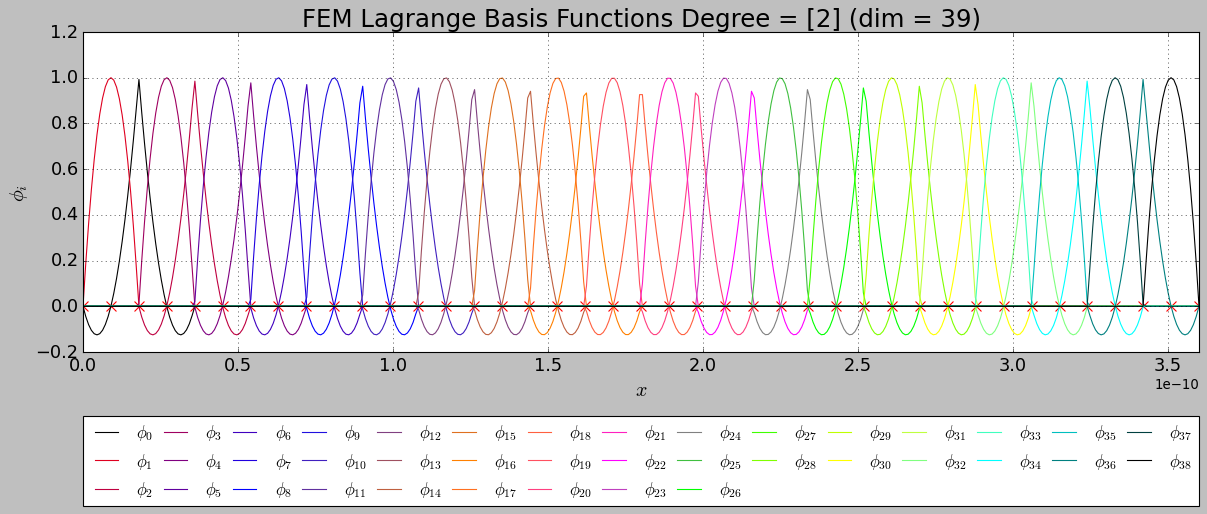

In [6]:
'''Build the basis functions'''

from engy_5310.toolkit import LagrangeFEMBasis 

degree = 2
n_elem = [20] 

femlb = LagrangeFEMBasis(degree=degree, n_elem=n_elem, x_partition=[x_a, x_b], bc_x_min='dirichlet', bc_x_max='dirichlet')
femlb.plot(n_plot_pts=400, n_legend_cols=15)

  + $A_{i,j} = \bigl(D\,\phi'_i,\phi'_j\bigr) - E\bigl(\phi_i,\phi_j\bigr)$

In [7]:
'''Build the matrix of coefficients of the linear system'''

d_mtrx = femlb.inner_product_matrix(lambda x: diffusion_coeff, "u'", "v'")
g_mtrx = femlb.inner_product_matrix(lambda x:1.0, 'u', 'v')

In [8]:
import numpy as np
    
if np.linalg.matrix_rank(d_mtrx) == min(d_mtrx.shape):
    print('D is full rank.')
else:
    print('D is rank deficient.')

if np.linalg.matrix_rank(g_mtrx) == min(g_mtrx.shape):
    print('G is full rank.')
else:
    print('G is rank deficient.')

D is full rank.
G is full rank.


In [9]:
'''Compute optimal coefficient eigenvectors'''
import scipy
lambda_vec, eigen_vec = scipy.linalg.eigh(d_mtrx, g_mtrx)

In [10]:
import numpy as np
import math

n_quantum_numbers = 5
np.set_printoptions(precision=5)
energy_dimensionless = lambda_vec/(diffusion_coeff*math.pi**2/x_b**2)
print('E [hbar^2/2/mu*pi^2/L^2] = ', energy_dimensionless[:n_quantum_numbers])
quantum_numbers = np.round(np.sqrt(energy_dimensionless),1)
print('Quantum numbers = ', quantum_numbers[:n_quantum_numbers])

E [hbar^2/2/mu*pi^2/L^2] =  [ 1.       4.00005  9.00061 16.00339 25.0128 ]
Quantum numbers =  [1. 2. 3. 4. 5.]


In [ ]:
'''Build the best approximation function in V_N'''

def u_star(x, c_star_vec):
    u_0 = femlb.evaluation_matrix(x)@c_star_vec
    return u_0

In [ ]:
'''Build the derivative '''

def u_prime_star(x, c_star_vec):
    u_0 = femlb.evaluation_matrix(x, derivative=True)@c_star_vec
    return u_0

In [ ]:
'''Build the best approximation function in V_N'''

def u_flux_x(x, c_star_vec):
    return -diffusion_coeff*u_prime_star(x, c_star_vec)

In [ ]:
'''Table of results for the fundamental mode'''

def results_table(quantum_number):
    assert isinstance(quantum_number, int)
    assert quantum_number >= 1
    x_table = np.linspace(x_a, x_b, 25)
    
    quantum_number_id = quantum_number - 1

    #c_star_vec = eigen_vec[:,quantum_number_id]/scipy.linalg.norm(eigen_vec[:,quantum_number_id])
    c_star_vec = eigen_vec[:,quantum_number_id]
    u_values = u_star(x_table, c_star_vec)
    (normalizing_val, ) = np.where(np.abs(u_values) == np.abs(u_values).max())
    print(normalizing_val)
    u_values /= u_values[normalizing_val[0]]

    #normalizing_val = np.abs(u_values).max()
    #u_values /= normalizing_val

    flux_values = u_flux_x(x_table, c_star_vec)
    (normalizing_val, ) = np.where(np.abs(flux_values) == np.abs(flux_values).max())
    flux_values /= flux_values[normalizing_val[0]]

    #normalizing_val = np.abs(flux_values).max()
    #flux_values /= normalizing_val

    print('Quantum Number = ',quantum_number)
    print('')

    print("   x [A]        u [a.u.]      -D u'_x [a.u.]")
    for i,(x,t,q)in enumerate(zip(x_table, u_values, flux_values)):
        print('%2i)'%(i+1), ' %2.2f'%(x/unit.angstrom), '       %3.5f'%t, '      %3.5f'%q)

In [ ]:
'''Table of results '''

quantum_number = 7
results_table(quantum_number)

In [ ]:
'''Plot neutron flux modes'''
from engy_5310.toolkit import color_map

def plot_modes(k_vec, eigen_vec):

    k_vec = k_vec.round(5)
    n_pts = 300
    x = np.linspace(x_a, x_b, n_pts)
    
    
    import matplotlib.pyplot as plt
    plt.style.use('classic')
    (fig, ax1) = plt.subplots(1, figsize=(14, 5))
    ax2 = ax1.twinx()
    
    colors = color_map(k_vec.shape[0])

    for j,k in enumerate(k_vec):
        c_star_vec = eigen_vec[:,j]/scipy.linalg.norm(eigen_vec[:,j])
        
        u_values = u_star(x, c_star_vec)
        #why? (normalizing_val, ) = np.where(np.abs(u_values) == np.abs(u_values).max())
        #why? u_values /= u_values[normalizing_val[0]]
        normalizing_val = np.abs(u_values).max()
        u_values /= normalizing_val

        u_flux_x_values = u_flux_x(x, c_star_vec)
        #(normalizing_val, ) = np.where(np.abs(u_flux_x_values) == np.abs(u_flux_x_values).max())
        #u_flux_x_values /= u_flux_x_values[normalizing_val[0]]
        normalizing_val = np.abs(u_flux_x_values).max()
        u_flux_x_values /= normalizing_val

        ax1.plot(x/unit.angstrom, u_values, '-', label=r'wave function $n$=%2.2f'%k, color=colors[j])
        
        ax1.set_xlabel(r'$x$ [A]', fontsize=18)
        ax1.set_ylabel(r'$u_N$ [a.u.]', fontsize=18, color='black')
        ax1.tick_params(axis='y', labelcolor='black', labelsize=16)
        ax1.tick_params(axis='x', labelsize=16)
        ax1.legend(loc='upper left', fontsize=12)
        ax1.grid(True)
        
        ax2.plot(x/unit.angstrom, u_flux_x_values,'--', color=colors[j], label='flux $n$=%2.2f'%k)

        ax2.set_ylabel(r"$-D\,u'_N$ [a.u.]", fontsize=16, color='black')
        ax2.tick_params(axis='y', labelcolor='black', labelsize=16)
        ax2.legend(loc='upper right', fontsize=12)
        
    plt.title(r'Electron Energy Modes ($n$=%s # elem=%s, N=%i)'%(str(list(k_vec)),n_elem,len(femlb.basis_func_list)), fontsize=20)
    plt.show()

In [ ]:
plot_modes(quantum_numbers[0:1], eigen_vec[:,0:1])

In [ ]:
plot_modes(quantum_numbers[1:5], eigen_vec[:,1:5])

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
plt.style.use('dark_background')

L=3.9 # Angstrom

def wave_function(x, n):
    return np.sin(n*x*np.pi/L)

def expectation_position(x, n):
    pass

def expectation_linear_momentum(x, n):
    pass

xlist=np.linspace(0 ,L)
ylist=f(xlist, 1)
zlist=f(xlist, 2)
glist=f(xlist, 3)
mlist=f(xlist, 4)
alist=f(xlist, 5)
plist=f(xlist, 6)
hlist=f(xlist, 7)
klist=f(xlist, 8)
plt.plot(xlist,ylist, label="W1'[]", color='red')
plt.plot(xlist,zlist , label="W2", color='orange')
plt.plot(xlist,glist , label="W3", color='cyan')
plt.plot(xlist,mlist,label='W4', color='yellow')
#plt.plot(xlist,alist ,label='W5', color='pink')
#plt.plot(xlist,plist ,label='W6', color='purple')
#plt.plot(xlist,hlist ,'--',label='W7', color='pink')
#plt.plot(xlist,klist ,label='W8', color='orange')
plt.xlabel('x [A]');plt.ylabel('ψ(x)')
plt.title('Particle in Box' )
    